In [496]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import matplotlib
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

### Data Table: (Rows, Columns)

In [2]:
df=pd.read_csv('311_geo_report.csv',parse_dates=['requested_datetime','updated_datetime','closed_date'])
df.shape

(38921, 14)

### Sample Data

In [5]:
df.head()

,service_request_id,service_name,requested_datetime,source,description,status_description,updated_datetime,service_subtype,neighborhood_district,closed_date,location,address,lat,long
0,400578,Trash questions,2015-07-02 12:17:00,33891,DPW Sanitation,Closed,2017-06-26 20:17:00,information calls,Ward 7,2017-06-26 20:17:00,"80 Electric Ave\nSomerville, MA\n(42.403581, -...",80 Electric Ave,42.403581,-71.125199
1,400606,Request tree on public property,2015-07-02 12:59:00,43103,OSPCD,Closed,2017-06-08 12:35:00,Service Requests,Ward 5,2017-06-08 12:35:00,"32 Robinson St\nSomerville, MA\n(42.3928953, -...",32 Robinson St,42.392895,-71.101951
2,401540,Temporary no parking sign posting,2015-07-07 10:08:00,43542,Traffic and Parking,Closed,2017-06-29 15:58:00,internally generated,Ward 6,2017-06-29 15:58:00,"5 Windsor Rd\nSomerville, MA\n(42.3930438, -71...",5 Windsor Rd,42.393044,-71.115367
3,402710,Request tree on public property,2015-07-10 11:12:00,27228,OSPCD,Closed,2016-02-23 10:08:00,Service Requests,Ward 3,2016-02-23 10:08:00,"56 Lowell St\nSomerville, MA\n(42.3863771, -71...",56 Lowell St,42.386377,-71.110644
4,403238,Arborist and tree maintenance,2015-07-13 15:20:00,31420,DPW-Highway,Closed,2017-05-09 14:03:00,Service Requests,Ward 7,2017-05-09 14:03:00,"17 Sunset Rd\nSomerville, MA\n(42.4087858, -71...",17 Sunset Rd,42.408786,-71.124307


### Number of request per year

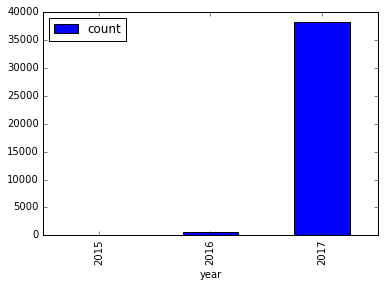

In [6]:
df['count']=1
df['year']=df.requested_datetime.dt.year
df[['year','count']].groupby('year').count().plot(kind='bar')

### Number of request per month (2017)

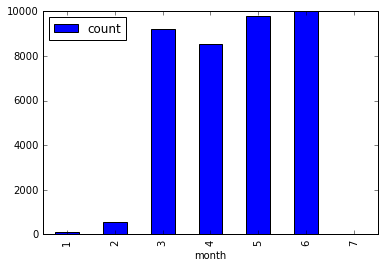

In [7]:
df=df[df['year']==2017]
df['month']=df.requested_datetime.dt.month
df[['month','count']].groupby('month').count().plot(kind='bar')

In [8]:
df=df[df.month>2]
df.shape

(37537, 17)

In [10]:
from censusgeocode import CensusGeocode

cg = CensusGeocode()


[]

In [11]:
cg.coordinates(x=-76, y=41)
cg.onelineaddress('1600 Pennsylvania Avenue, Washington, DC')
cg.address('1600 Pennsylvania Avenue', city='Washington', state='DC', zipcode='22052')

[]

In [49]:
df_a=df[df.lat>0]
df_a.lat.iloc[0],df_a.long.iloc[0]

(42.400968400000004, -71.1170197)

In [65]:
for i in range(10):
    y,x=df_a.lat.iloc[0],df_a.long.iloc[i]
    result = cg.coordinates(x, y)
    print result[0]['Census Tracts'][0]['TRACT']

350400
350600
350800
339600


KeyError: 'TRACT'

In [66]:
result

[{u'2010 Census Blocks': [{u'AREALAND': 11933,
    u'AREAWATER': 0,
    u'BASENAME': u'1004',
    u'BLKGRP': u'1',
    u'BLOCK': u'1004',
    u'CENTLAT': u'+42.4008586',
    u'CENTLON': u'-071.1269799',
    u'COUNTY': u'017',
    u'FUNCSTAT': u'S',
    u'GEOID': u'250173508001004',
    u'INTPTLAT': u'+42.4008586',
    u'INTPTLON': u'-071.1269799',
    u'LSADC': u'BK',
    u'LWBLKTYP': u'L',
    u'MTFCC': u'G5040',
    u'NAME': u'Block 1004',
    u'OBJECTID': 4158788,
    u'OID': 210404033707162,
    u'STATE': u'25',
    u'SUFFIX': u'',
    u'TRACT': u'350800'}],
  u'Census Tracts': [{u'status': u'Layer query encountered an error: java.lang.RuntimeException: Failed to return'}],
  u'Counties': [{u'AREALAND': 2117852212,
    u'AREAWATER': 75797487,
    u'BASENAME': u'Middlesex',
    u'CENTLAT': u'+42.4853692',
    u'CENTLON': u'-071.3915715',
    u'COUNTY': u'017',
    u'COUNTYCC': u'H4',
    u'COUNTYNS': u'00606935',
    u'FUNCSTAT': u'N',
    u'GEOID': u'25017',
    u'INTPTLAT': u'+42.